# Plotting Isobaric Binary Phase Diagrams with `binplot`

These are a few examples of how to use Thermo-Calc TDB files to calculate isobaric binary phase diagrams. As long as the TDB file is present, each cell in these examples is self contained and can completely reproduce the figure shown.

### binplot

The phase diagrams are computed with `binplot`, which has four required arguments:
1. The Database object
2. A list of active components (vacancies (`VA`), which are present in many databases, must be included explictly).
3. A list of phases to consider in the calculation
4. A dictionary conditions to consider, with keys of pycalphad StateVariables and values of scalars, 1D arrays, or `(start, stop, step)` ranges

Note that, at the time of writing, invariant reactions (three-phase 'regions' on binary diagrams) are not yet automatically detected so they
are not drawn on the diagram.

Also note that the [magic variable](https://ipython.readthedocs.io/en/stable/interactive/magics.html) `%matplotlib inline` should only be used in Jupyter notebooks.


### TDB files

The TDB files should be located in the current working directory of the notebook. If you are running using a Jupyter notebook, the default working directory is the directory that that notebook is saved in. 

To check the working directory, run:

```python
import os
print(os.path.abspath(os.curdir))
```

TDB files can be found in the literature. The [Thermodynamic DataBase DataBase](https://avdwgroup.engin.brown.edu) (TDBDB) has indexed many available databases and links to the original papers and/or TDB files where possible.


## Al-Zn (S. Mey, 1993)

The miscibility gap in the fcc phase is included in the Al-Zn diagram, shown below.

The format for specifying a range of a state variable is (*start*, *stop*, *step*).

S. an Mey, Zeitschrift für Metallkunde 84(7) (1993) 451-455.

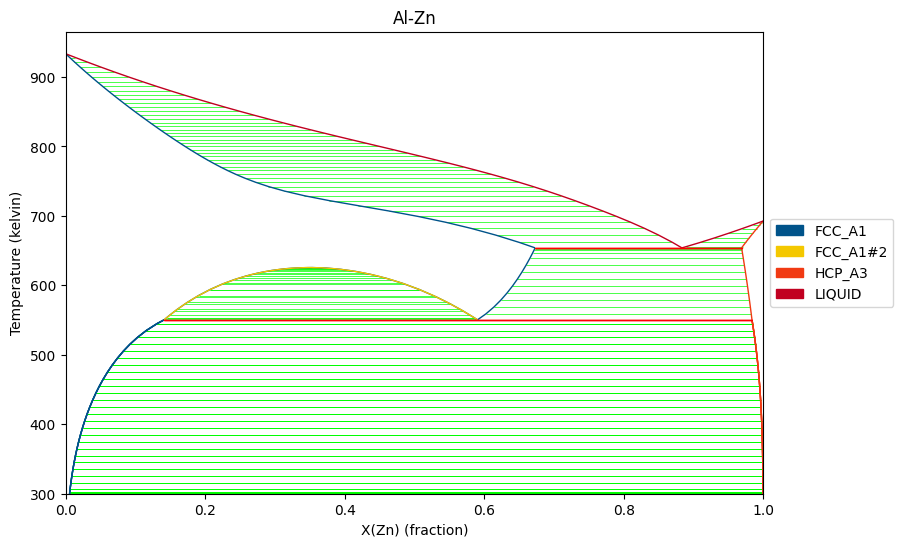

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
import pycalphad.variables as v

# Load database and choose the phases that will be considered
db_alzn = Database('alzn_mey.tdb')
my_phases_alzn = ['LIQUID', 'FCC_A1', 'HCP_A3']

# Create a matplotlib Figure object and get the active Axes
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

# Compute the phase diagram and plot it on the existing axes using the `plot_kwargs={'ax': axes}` keyword argument
binplot(db_alzn, ['AL', 'ZN', 'VA'] , my_phases_alzn, {v.X('ZN'):(0,1,0.02), v.T: (300, 1000, 10), v.P:101325, v.N: 1}, plot_kwargs={'ax': axes})

plt.show()

## Al-Mg (Y. Zhong, 2005)

Y. Zhong, M. Yang, Z.-K. Liu, CALPHAD 29 (2005) 303-311 doi:[10.1016/j.calphad.2005.08.004](https://doi.org/10.1016/j.calphad.2005.08.004)

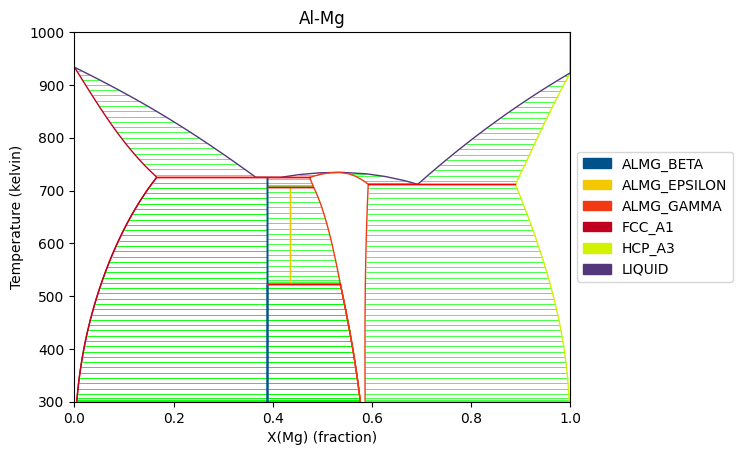

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
import pycalphad.variables as v

# Load database 
dbf = Database('Al-Mg_Zhong.tdb')
# Define the components
comps = ['AL', 'MG', 'VA']
# Get all possible phases programmatically
phases = dbf.phases.keys()

# Plot the phase diagram, if no axes are supplied, a new figure with axes will be created automatically
binplot(dbf, comps, phases, {v.N: 1, v.P:101325, v.T: (300, 1000, 10), v.X('MG'):(0, 1, 0.02)})

plt.show()

## Al-Ni (Dupin, 2001)

Components and conditions can also be stored as variables and passed to binplot.

N. Dupin, I. Ansara, B. Sundman, CALPHAD 25(2) (2001) 279-298 doi:[10.1016/S0364-5916(01)00049-9](https://doi.org/10.1016/S0364-5916(01)00049-9)

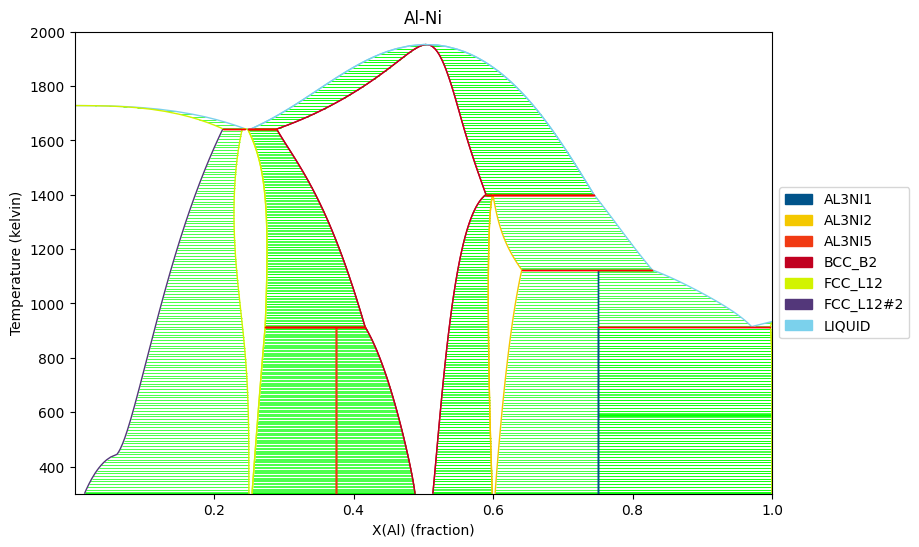

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
import pycalphad.variables as v

# Load database
dbf = Database('NI_AL_DUPIN_2001.TDB')
# Set the components to consider, including vacanies (VA) explictly.
comps = ['AL', 'NI', 'VA']
# Get all the phases in the database programatically
phases = list(dbf.phases.keys())
# Create the dictionary of conditions
conds = {
    v.N: 1, v.P: 101325,
    v.T: (300, 2000, 10),  # (start, stop, step)
    v.X('AL'): (1e-5, 1, 0.02),   # (start, stop, step)
}

# Create a matplotlib Figure object and get the active Axes
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

# Plot by passing in all the variables
binplot(dbf, comps, phases, conds, plot_kwargs={'ax': axes})

plt.show()

## Al-Fe (M. Seiersten, 1991)

Removing tielines

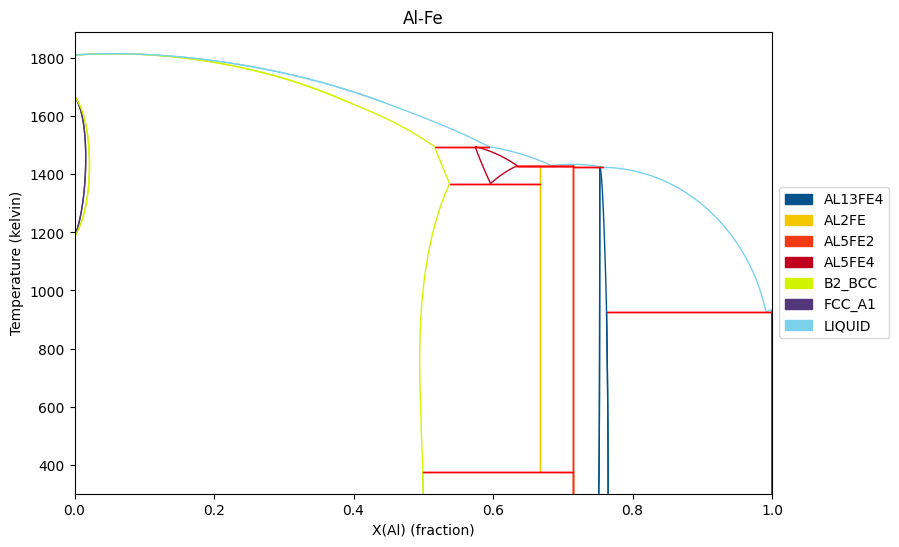

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
import pycalphad.variables as v

# Load database and choose the phases that will be considered
db_alfe = Database('alfe_sei.TDB')
my_phases_alfe = ['LIQUID', 'B2_BCC', 'FCC_A1', 'HCP_A3', 'AL5FE2', 'AL2FE', 'AL13FE4', 'AL5FE4']

# Create a matplotlib Figure object and get the active Axes
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

# Plot the phase diagram on the existing axes using the `plot_kwargs={'ax': axes}` keyword argument
# Tielines are turned off by including `'tielines': False` in the plotting keword argument
binplot(db_alfe, ['AL', 'FE', 'VA'] , my_phases_alfe, {v.X('AL'):(0,1,0.01), v.T: (300, 2000, 10), v.P:101325}, plot_kwargs={'ax': axes, 'tielines': False})

plt.show()

## Nb-Re (Liu, 2013)

X.L. Liu, C.Z. Hargather, Z.-K. Liu, CALPHAD 41 (2013) 119-127 doi:[10.1016/j.calphad.2013.02.006](https://doi.org/10.1016/j.calphad.2013.02.006)

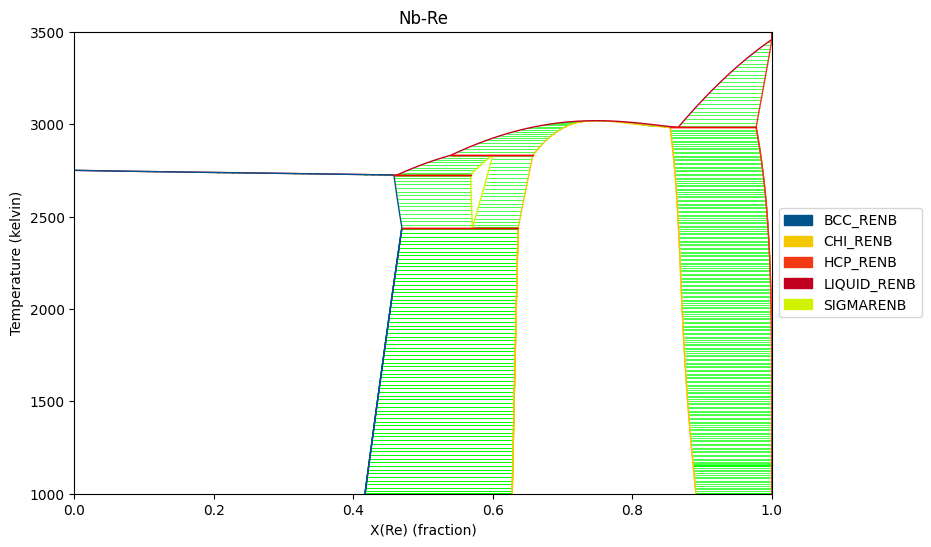

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot, variables as v

# Load database and choose the phases that will be plotted
db_nbre = Database('nbre_liu.tdb')
my_phases_nbre = ['CHI_RENB', 'SIGMARENB', 'FCC_RENB', 'LIQUID_RENB', 'BCC_RENB', 'HCP_RENB']

# Create a matplotlib Figure object and get the active Axes
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

# Plot the phase diagram on the existing axes using the `plot_kwargs={'ax': axes}` keyword argument
binplot(db_nbre, ['NB', 'RE'] , my_phases_nbre, {v.X('RE'): (0,1,0.01), v.T: (1000, 3500, 20), v.P:101325}, plot_kwargs={'ax': axes})

axes.set_xlim(0, 1)
plt.show()